In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# NBA Hypothesis Testing

## Problem 1

First we load the NBA data set into a Pandas dataframe.

In [2]:
df = pd.read_csv('nba_data.csv')

The `date` column is read as a string. We need to convert it to a `datetime` data type.

In [3]:
df['date'] = pd.to_datetime(df['date'], format='%A, %B %d, %Y')

### Part A

We can count the number of games in the dataset.

In [4]:
print(f"Number of games: {len(df)}")

Number of games: 60688


### Part B

We can look at the columns in the dataset.

In [5]:
print('Columns:')
for col in df.columns: 
    print(f"  {col}")

Columns:
  season
  date
  home_pt
  home_team
  away_pt
  away_team
  finished_in
  winner_pt
  margin


### Part C

We will create a column for the difference between home and away score for each game.

In [6]:
df['pt_diff'] = df['home_pt'] - df['away_pt']

### Part D

We will also create a column for the total number of points scored in each game.

In [7]:
df['total_pt'] = df['home_pt'] + df['away_pt']

### Part E

We create a function `weekend_new_column()` to add two new columns to the dataframe: 
- `day_of_week` for the day of the week the game was held ($\{0, \ldots, 6\}$) 
- `weekend` for if the game was on a weekend ($\{0, 1\}$).

In [8]:
def weekend_new_column(df):
    """Adds two columns to the dataframe:
        - `day_of_week` for the day of the week the game was held.
        - `weekend` for if the game was on a weekend.
        
    Args:
        df (DataFrame): A dataframe containing the existing NBA 
            historical data of games with a column `date`.
    
    Returns:
        DataFrame: New dataframe with the additional two columns.
        
    """
    df['day_of_week'] = df['date'].apply(lambda date: date.weekday())
    df['weekend'] = df['day_of_week'] >= 5
    
    return df

### Part F

We use the function defined in the previous part and create the new columns specified above.

In [9]:
df = weekend_new_column(df)

## Problem 2

### Part A

We can plot the average total score for each season.

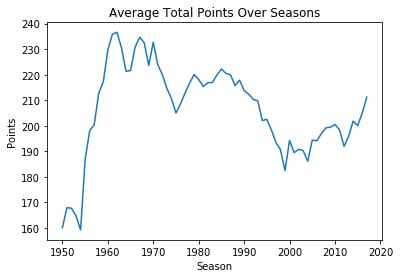

In [10]:
plt.plot(df.groupby('season').mean()['total_pt'])

plt.title('Average Total Points Over Seasons')
plt.ylabel('Points')
_ = plt.xlabel('Season')

It seems that when this data was first recorded, around the 1950s, there was significantly fewer total points scored than in the 1960s and beyond. Once the 1960s arrived, there was a drastic increase in the number of total points scored. After the 1960s, the total points begins to generally decrease (particularly in the mid-1970s and mid-1990s) until the mid 2000s. Now the total points are trending upwards.

### Part B

For every game, we can plot a histogram of the number of total points scored.

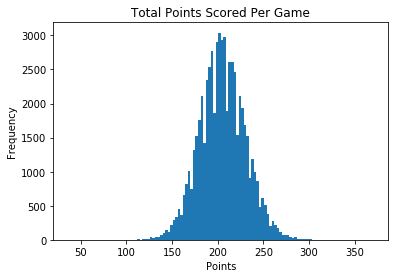

In [11]:
plt.hist(df['total_pt'], bins=120)

plt.title('Total Points Scored Per Game')
plt.ylabel('Frequency')
_ = plt.xlabel('Points')

### Part C

There appears to be strong evidence for normality. The distribution is largely bell-shaped and symmetric. However, there appear to a few bins that have significantly lower frequencies than their surrounding bins.

### Part D

We can plot a quantile-quantile plot to test our visual evidence for normality.

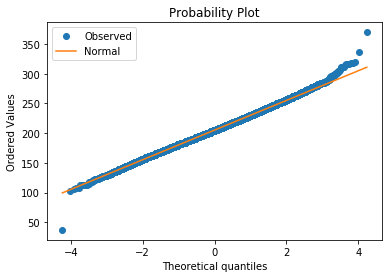

In [12]:
_, ax = plt.subplots()

stats.probplot(df['total_pt'], plot=ax)

ax.get_lines()[0].set_color('#1f77b4')
ax.get_lines()[1].set_color('#ff7f0e')

ax.get_lines()[0].set_label('Observed')
ax.get_lines()[1].set_label('Normal')

_ = plt.legend()

It appears that the distribution closely resembles a normal distribution. The evidence against is located at the right tail. It appears the right tail might be a little more heavily-weighted than a normal distribution.

## Problem 3

In this problem we test whether or not scoring became more conservative in the NBA during the 1990s.

### Part A

We partition our dataset to just include seasons between $1970$ and $2000$.

In [13]:
df_subset = df[(df['season'] >= 1970) & (df['season'] < 2000)]

### Part B

Now we split the data subset into groups before and after $1990$.

In [14]:
df_subset_before = df_subset[df_subset['season'] < 1990]
df_subset_after = df_subset[df_subset['season'] >= 1990]

### Part C

The null hypothesis we wish to test is that average total points scored in games between the two periods is equivalent. The alternative hypothesis is that the two means are not equal. Mathematically,
$$ H_0 : \mu_{\mathrm{before}} = \mu_{\mathrm{after}} $$
$$ H_1 : \mu_{\mathrm{before}} \neq \mu_{\mathrm{after}} $$

### Part D

We can evaluate the mean total scores of each period.

In [15]:
hat_mu_before = df_subset_before['total_pt'].mean()
hat_mu_after = df_subset_after['total_pt'].mean()

print(f"Mean Before: {hat_mu_before}")
print(f"Mean After: {hat_mu_after}")

Mean Before: 217.3702106485321
Mean After: 202.07596566523605


### Part E

We run a two-sample $t$-test for the two means without assuming equal variance.

In [16]:
results = stats.ttest_ind(df_subset_before['total_pt'],
                          df_subset_after['total_pt'], 
                          equal_var=False)

print(f"t: {results.statistic}")
print(f"p-value: {results.pvalue}")

t: 58.56557673842027
p-value: 0.0


### Part F

From the last part, we see that the $p$-value is zero and the $t$-statistic is quite high. Therefore, we can reject the null that the means are equivalent with low $\alpha$-level ($\alpha$ less than $0.05$).

## Problem 4

In this problem we test whether there is a home-court advantage.

### Part A

First we create a subset of data only including years in the inclusive range $[2000, 2017]$.

In [17]:
df_subset = df[(df['season'] >= 2000) & (df['season'] <= 2017)]

### Part B

We can check the mean difference between the points scored by the home team and the away team in this subset.

In [18]:
df_subset['pt_diff'].mean()

3.204781839368176

### Part C

The null hypothesis we wish to test is that average difference of points scored by the home and away team is zero. The alternative hypothesis is that the home team has an advantage, therefore the difference should be positive. Mathematically,
$$ H_0 : \mu_{\mathrm{home}} - \mu_{\mathrm{away}} = 0 $$
$$ H_1 : \mu_{\mathrm{home}} - \mu_{\mathrm{away}} > 0 $$

### Part D

We run a one-sample $t$-test for the mean difference. Note we are doing a one-sided $t$-test so we divide the $p$-value by $2$.

In [19]:
results = stats.ttest_1samp(df_subset['pt_diff'], 0)

print(f"t: {results.statistic}")
print(f"p-value: {results.pvalue / 2}")

t: 37.492696922047486
p-value: 4.968793905787681e-299


### Part E

From the last part, we see that the $p$-value is nearly zero and the $t$-statistic is high. Therefore, we can reject the null that the difference is zero with low $\alpha$-level ($\alpha$ less than $0.05$).

## Problem 5

In this problem we test if there is a difference between scoring on weekday vs weekend games.

### Part A

We again restrict the data to just include seasons $[2000, 2017]$.

In [20]:
df_subset = df[(df['season'] >= 2000) & (df['season'] <= 2017)]

### Part B

We can compute two histograms for weekend and weekday game total scores.

In [21]:
df_subset_weekday = df_subset[df_subset['weekend'] == False]
df_subset_weekend = df_subset[df_subset['weekend'] == True]

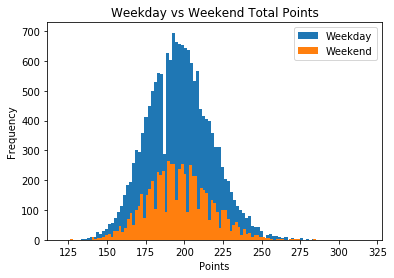

In [22]:
plt.hist(df_subset_weekday['total_pt'], bins=100, label='Weekday')
plt.hist(df_subset_weekend['total_pt'], bins=100, label='Weekend')

plt.legend()
plt.title('Weekday vs Weekend Total Points')
plt.ylabel('Frequency')
_ = plt.xlabel('Points')

### Part C

We can compute the average total points for weekday and weekend games.

In [23]:
hat_mu_weekday = df_subset_weekday['total_pt'].mean()
hat_mu_weekend = df_subset_weekend['total_pt'].mean()

print(f"Mean Weekday: {hat_mu_weekday}")
print(f"Mean Weekend: {hat_mu_after}")

Mean Weekday: 196.9075830797685
Mean Weekend: 202.07596566523605


### Part D

The null hypothesis we wish to test is that average total points scored in weekday games is equal in weekend games. The alternative hypothesis is that the two means are not equal. Mathematically,
$$ H_0 : \mu_{\mathrm{weekday}} = \mu_{\mathrm{weekend}} $$
$$ H_1 : \mu_{\mathrm{weekday}} \neq \mu_{\mathrm{weekend}} $$

### Part E

We run a two-sample $t$-test for the two means without assuming equal variance.

In [24]:
results = stats.ttest_ind(df_subset_weekday['total_pt'],
                          df_subset_weekend['total_pt'], 
                          equal_var=False)

print(f"t: {results.statistic}")
print(f"p-value: {results.pvalue}")

t: 1.5318301686986437
p-value: 0.12559161393965187


### Part F

From the last part, we see that the $p$-value is roughly 13\% and the $t$-statistic is relatively low. Therefore, we cannot reject the null that the means are equal with low $\alpha$-level ($\alpha$ less than $0.13$).

## Problem 6

In this problem, we consider if teams are more conservative (lower scoring) in the playoffs than they are in the regular season.

### Part A

We produce two datasets, one for games between April and June for playoffs and one for games between September and February for regular season.

In [25]:
df_subset_playoffs = df[df['date'].apply(lambda d: (d.month >= 4) 
                                         & (d.month <= 6))]
df_subset_regular = df[df['date'].apply(lambda d: (d.month >= 9) 
                                        | (d.month <= 2))]

### Part B

We can check the number of playoff vs regular season games.

In [26]:
print(f"Playoff Games: {len(df_subset_playoffs)}")
print(f"Regular Games: {len(df_subset_regular)}")

Playoff Games: 8595
Regular Games: 41352


### Part C

We can calculate the mean total points between the subsets.

In [27]:
hat_mu_playoffs = df_subset_playoffs['total_pt'].mean()
hat_mu_regular = df_subset_regular['total_pt'].mean()

print(f"Mean Playoffs: {hat_mu_playoffs}")
print(f"Mean Regular: {hat_mu_regular}")

Mean Playoffs: 202.49680046538685
Mean Regular: 205.5076175275682


### Part D

We can plot the total scores throughout the seasons for both playoff and regular season.

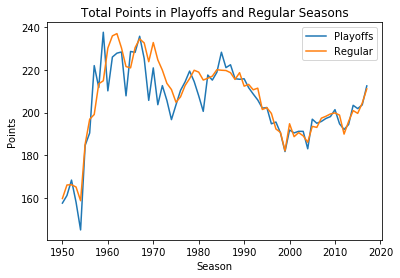

In [28]:
plt.plot(df_subset_playoffs.groupby('season').mean()['total_pt'], 
         label='Playoffs')
plt.plot(df_subset_regular.groupby('season').mean()['total_pt'], 
         label='Regular')

plt.legend()
plt.title('Total Points in Playoffs and Regular Seasons')
plt.ylabel('Points')
_ = plt.xlabel('Season')

It seems that, for the most part, the total points in playoffs and regular season are closely related. However, in the 1960s and 1970s (and a little bit of the 1980s), it seems that the average scores in the playoffs was often lower than the average scores in the regular season.

### Part E

The null hypothesis we wish to test is that average total points scored in playoff games is equal in regular games. The alternative hypothesis is that the two means are not equal. Mathematically,
$$ H_0 : \mu_{\mathrm{playoffs}} = \mu_{\mathrm{regular}} $$
$$ H_1 : \mu_{\mathrm{playoffs}} < \mu_{\mathrm{regular}} $$

### Part F

Given the differences over the complete time period, we consider two time periods independently: $[1960, 1980]$ and $[2000, 2017]$. We first consider the $[1960, 1980]$ time period.

In [29]:
df_subset_playoffs_19 = df_subset_playoffs[(df_subset_playoffs['season'] >= 1960) 
                                        & (df_subset_playoffs['season'] <= 1980)]
df_subset_regular_19 = df_subset_regular[(df_subset_regular['season'] >= 1960) 
                                         & (df_subset_regular['season'] <= 1980)]

### Part G

We can compare the means of the total points scored between the playoffs and regular season for the subset.

In [30]:
hat_mu_playoffs_19 = df_subset_playoffs_19['total_pt'].mean()
hat_mu_regular_19 = df_subset_regular_19['total_pt'].mean()

print(f"Mean Playoffs: {hat_mu_playoffs_19}")
print(f"Mean Regular: {hat_mu_regular_19}")

Mean Playoffs: 213.3367935409458
Mean Regular: 220.84210004952948


### Part H

We run a two-sample $t$-test for the two means without assuming equal variance.

In [31]:
results = stats.ttest_ind(df_subset_playoffs_19['total_pt'],
                          df_subset_regular_19['total_pt'], 
                          equal_var=False)

print(f"t: {results.statistic}")
print(f"p-value: {results.pvalue}")

t: -10.064931585735033
p-value: 8.557608405175591e-23


### Part I

From the last part, we see that the $p$-value is nearly zero and the $t$-statistic is high (in magnitude). Therefore, we can reject the null that the difference is zero in favor of the alternative that the average total score for playoffs is lower than regular season with low $\alpha$-level ($\alpha$ less than $0.05$). 


### Part J

We now consider the $[2000, 2017]$ time period.

In [32]:
df_subset_playoffs_20 = df_subset_playoffs[(df_subset_playoffs['season'] >= 2000) 
                                        & (df_subset_playoffs['season'] <= 2017)]
df_subset_regular_20 = df_subset_regular[(df_subset_regular['season'] >= 2000) 
                                         & (df_subset_regular['season'] <= 2017)]

### Part K

We can compare the means of the total points scored between the playoffs and regular season for the subset.

In [33]:
hat_mu_playoffs_20 = df_subset_playoffs_20['total_pt'].mean()
hat_mu_regular_20 = df_subset_regular_20['total_pt'].mean()

print(f"Mean Playoffs: {hat_mu_playoffs_20}")
print(f"Mean Regular: {hat_mu_regular_20}")

Mean Playoffs: 196.16927490871151
Mean Regular: 196.49699610483924


### Part L

We run a two-sample $t$-test for the two means without assuming equal variance.

In [34]:
results = stats.ttest_ind(df_subset_playoffs_20['total_pt'],
                          df_subset_regular_20['total_pt'], 
                          equal_var=False)

print(f"t: {results.statistic}")
print(f"p-value: {results.pvalue}")

t: -0.8505001514109403
p-value: 0.3950826083683683


### Part M

From the last part, we see that the $p$-value is roughly 40\% and the $t$-statistic is low (in magnitude). Therefore, we cannot reject the null that the difference is zero in favor of the alternative that the average total score for playoffs is lower than regular season with low $\alpha$-level ($\alpha$ less than $0.05$).

I do not necessarily believe this is direct evidence that differences in scoring are no long as different as they used to be. Although the difference was statistically significant before and it is no longer, we should probably run a hypothesis test on whether the difference between the two periods is statistically significant.

## Problem 7

In this problem we consider the significance of the Michael Jordan effect.

### Part A

We consider only the years $[1992, 1997]$ and games featuring the Chicago Bulls.

In [35]:
df_subset = df[(df['season'] >= 1992) & (df['season'] <= 1997) 
               & ((df['home_team'] == 'Chicago Bulls') 
                  | (df['away_team'] == 'Chicago Bulls'))].copy()

### Part B

We create three new columns:
- `for_score`: points scored by the Chicago Bulls (home or away) in the seasons 1992-1997.
- `against_score`: points scored against the Chicago Bulls (home or away) in the seasons 1992-1997.
- `net_score`: net score by the Chicago Bulls (home or away) in the seasons 1992-1997.

In [36]:
df_subset['for_score'] = df_subset['home_pt'].where(
                                df_subset['home_team'] == 'Chicago Bulls', 
                                df_subset['away_pt'])
df_subset['against_score'] = df_subset['away_pt'].where(
                                df_subset['home_team'] == 'Chicago Bulls', 
                                df_subset['home_pt'])
df_subset['net_score'] = df_subset['for_score'] - df_subset['against_score']

### Part C

We now construct two disjoint set with and without Michael Jordan playing.

In [37]:
df_subset_jordan = df_subset[(df_subset['season'] <= 1993) 
                             | (df_subset['season'] >= 1996)]
df_subset_no_jordan = df_subset[(df_subset['season'] >= 1994) 
                                & (df_subset['season'] <= 1995)]

### Part D

The null hypothesis we wish to test is that average for points scored with Michael Jordan games is equal in no Michael Jordan games. The alternative hypothesis is that the average for points with Michael Jordan is greater than without Michael Jordan. Mathematically,
$$ H_0 : \mu_{\mathrm{jordan}} = \mu_{\mathrm{no\ jordan}} $$
$$ H_1 : \mu_{\mathrm{jordan}} > \mu_{\mathrm{no\ jordan}} $$

Or, the null hypothesis we wish to test is that average against points scored with Michael Jordan games is equal in no Michael Jordan games. The alternative hypothesis is that the average against points with Michael Jordan is less than without Michael Jordan. Mathematically,
$$ H_0 : \mu_{\mathrm{jordan}} = \mu_{\mathrm{no\ jordan}} $$
$$ H_1 : \mu_{\mathrm{jordan}} < \mu_{\mathrm{no\ jordan}} $$

Or, the null hypothesis we wish to test is that average net points scored with Michael Jordan games is equal in no Michael Jordan games. The alternative hypothesis is that the average net points with Michael Jordan is greater than without Michael Jordan. Mathematically,
$$ H_0 : \mu_{\mathrm{jordan}} = \mu_{\mathrm{no\ jordan}} $$
$$ H_1 : \mu_{\mathrm{jordan}} > \mu_{\mathrm{no\ jordan}} $$

### Part E

We compute the mean for score with and without Michael Jordan.

In [38]:
hat_mu_jordan = df_subset_jordan['for_score'].mean()
hat_mu_no_jordan = df_subset_no_jordan['for_score'].mean()

print(f"Mean Jordan: {hat_mu_jordan}")
print(f"Mean No Jordan: {hat_mu_no_jordan}")

Mean Jordan: 104.39162561576354
Mean No Jordan: 99.33695652173913


### Part F

We run a two-sample $t$-test for the two means without assuming equal variance.

In [39]:
results = stats.ttest_ind(df_subset_jordan['for_score'],
                          df_subset_no_jordan['for_score'], 
                          equal_var=False)

print(f"t: {results.statistic}")
print(f"p-value: {results.pvalue / 2}")

t: 4.572966583169566
p-value: 3.4316212038540005e-06


### Part G

We compute the mean against score with and without Michael Jordan.

In [40]:
hat_mu_jordan = df_subset_jordan['against_score'].mean()
hat_mu_no_jordan = df_subset_no_jordan['against_score'].mean()

print(f"Mean Jordan: {hat_mu_jordan}")
print(f"Mean No Jordan: {hat_mu_no_jordan}")

Mean Jordan: 95.02216748768473
Mean No Jordan: 95.60326086956522


We run a two-sample $t$-test for the two means without assuming equal variance.

In [41]:
results = stats.ttest_ind(df_subset_jordan['against_score'],
                          df_subset_no_jordan['against_score'], 
                          equal_var=False)

print(f"t: {results.statistic}")
print(f"p-value: {results.pvalue / 2}")

t: -0.5863766703116524
p-value: 0.2789993668005224


### Part H

From Part F, we see that the $p$-value is approximately zero and the $t$-statistic is relatively high. Therefore, we can reject the null that the difference is zero in favor of the alternative that the average for score with Jordan is higher than without Jordan with low $\alpha$-level ($\alpha$ less than $0.05$).

From Part G, we see that the $p$-value is roughly 28\% and the $t$-statistic is relatively low (in magnitude). Therefore, we cannot reject the null that the difference is zero in favor of the alternative that the average against score with Jordan is lows than without Jordan with low $\alpha$-level ($\alpha$ less than $0.28$).

From this, Jordan's presence statistically significantly increases the Chicago Bulls' score, but does not statistically reduce the opponent's score.

### Part I

We compute the mean net score with and without Michael Jordan.

In [42]:
hat_mu_jordan = df_subset_jordan['net_score'].mean()
hat_mu_no_jordan = df_subset_no_jordan['net_score'].mean()

print(f"Mean Jordan: {hat_mu_jordan}")
print(f"Mean No Jordan: {hat_mu_no_jordan}")

Mean Jordan: 9.369458128078819
Mean No Jordan: 3.733695652173913


We run a two-sample $t$-test for the two means without assuming equal variance.

In [43]:
results = stats.ttest_ind(df_subset_jordan['net_score'],
                          df_subset_no_jordan['net_score'], 
                          equal_var=False)

print(f"t: {results.statistic}")
print(f"p-value: {results.pvalue / 2}")

t: 4.808760080098417
p-value: 1.1737130782218827e-06


### Part J

From Part F, we see that the $p$-value is approximately zero and the $t$-statistic is relatively high. Therefore, we can reject the null that the difference is zero in favor of the alternative that the average net score with Jordan is higher than without Jordan with low $\alpha$-level ($\alpha$ less than $0.05$).

This confirms the observations from the test in the previous parts as Jordan's presence increases the Chicago Bulls' scores and doesn't statistically significantly affect the opponent's score.

### Part K

Although Scottie Pipen and Phil Jackson were constant, we also need to consider other players (and coaches) on the Chicago Bulls' team. For example, other players likely retired during this period and new rookies were added as well. These players likely also had an impact on the scoring ability of the Chicago Bulls.

## Problem 8

In this problem we test if back-to-back games has an effect on total points scored.

### Part A

First we create a function to compute the number of combined rest days for the two teams.

In [44]:
def rest_days(df):
    """Adds a column `test_days` which counts the number of days from 
        the last played game.
        
    Args:
        df (DataFrame): A dataframe containing the existing NBA 
            historical data of games with a column `date`.
    
    Returns:
        DataFrame: New dataframe with the additional column.
        
    """
    last_game = { team: pd.to_datetime('1948-01-01', format='%Y-%m-%d') 
             for team in df['home_team'].unique() }

    def calc_rest(row):    

        days = min((row['date'] - last_game[row['home_team']]).days, 8) \
               + min((row['date'] - last_game[row['away_team']]).days, 8)

        last_game[row['home_team']] = row['date']
        last_game[row['away_team']] = row['date']

        return days

    df['rest_days'] = df.apply(calc_rest, axis=1)
    
    return df

### Part B

We can then apply this function to the dataframe.

In [45]:
df = rest_days(df)

### Part C

We plot a histogram of these rest days.

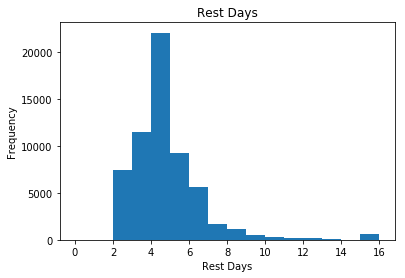

In [46]:
plt.hist(df['rest_days'], bins=16)

plt.title('Rest Days')
plt.ylabel('Frequency')
_ = plt.xlabel('Rest Days')

### Part D

The histogram suggests most teams probably have more than one day of rest each, but typically less six days of rest total.

### Part E

We create two subsets one for back-to-back games and longer than back-to-back.

In [47]:
df_subset = df[(df['season'] >= 2000) & (df['season'] <= 2017)]

df_subset_back_to_back = df_subset[df_subset['rest_days'] <= 3]
df_subset_longer = df_subset[(df_subset['rest_days'] >= 4) 
                             & (df_subset['rest_days'] <= 5)]

### Part F

The null hypothesis test we would like to test is if the mean total score for back-to-back games is equal to the mean total score for non-back-to-back games. The alternative is that the means are different. Mathematically,
$$ H_0 : \mu_{\mathrm{back\ to\ back}} = \mu_{\mathrm{longer}} $$
$$ H_1 : \mu_{\mathrm{back\ to\ back}} \neq \mu_{\mathrm{longer}} $$

### Part G

We compute the mean net score with and without rest days.

In [48]:
hat_mu_back_to_back = df_subset_back_to_back['total_pt'].mean()
hat_mu_longer = df_subset_longer['total_pt'].mean()

print(f"Mean Back to Back: {hat_mu_back_to_back}")
print(f"Mean Longer: {hat_mu_longer}")

Mean Back to Back: 196.54280821917808
Mean Longer: 197.18168168168168


### Part H

We run a two-sample $t$-test for the two means without assuming equal variance.

In [49]:
results = stats.ttest_ind(df_subset_back_to_back['total_pt'],
                          df_subset_longer['total_pt'], 
                          equal_var=False)

print(f"t: {results.statistic}")
print(f"p-value: {results.pvalue}")

t: -2.0251625604004104
p-value: 0.042871485628645116


### Part I

From the previous part, we see that the $p$-value is relatively close to zero and the $t$-statistic is moderately high (in magnitude). Therefore, we can reject the null that the means are equal in favor of the alternative that the average total score of back-to-back games is different than longer games with relatively low $\alpha$-level ($\alpha$ less than $0.05$).

### Part J

A possible confounding variable in determining if the difference between the back-to-back games and non-back-to-back games would be regular vs playoff season. I would expect games would be played more frequently during the playoffs than in the regular season. We already identified that there was a difference between regular season and playoffs season in terms of total points scored.